In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [17]:
data = pd.read_csv('house_rental_data.csv')
data.head()

,Unnamed: 0,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
0,1,1177.698,2,7,2,2,2,62000
1,2,2134.800,5,7,4,2,2,78000
2,3,1138.560,5,7,2,2,1,58000
3,4,1458.780,2,7,3,2,2,45000
4,5,967.776,11,14,3,2,2,45000


In [18]:
# Drop any duplicate rows
data = data.drop_duplicates()

# Convert the "Floor" and "TotalFloor" columns to numeric type
data['Floor'] = pd.to_numeric(data['Floor'], errors='coerce')
data['TotalFloor'] = pd.to_numeric(data['TotalFloor'], errors='coerce')

In [19]:
# Check the data types of each column
print(data.dtypes)

Unnamed: 0       int64
Sqft           float64
Floor            int64
TotalFloor       int64
Bedroom          int64
Living.Room      int64
Bathroom         int64
Price            int64
dtype: object


In [20]:
# Handle missing values
data.dropna(inplace=True)  # Drop rows with missing values

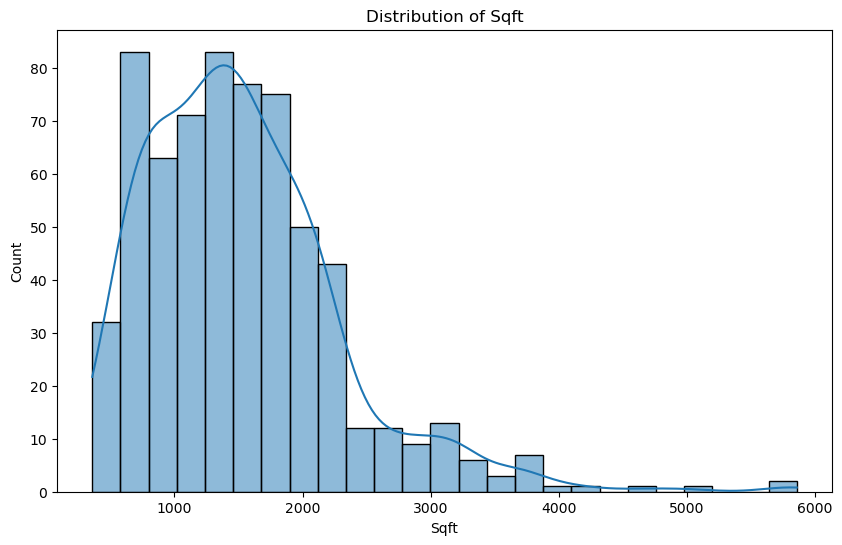

In [21]:
# Visualize the distributions of numeric features
plt.figure(figsize=(10, 6))
sns.histplot(data['Sqft'], kde=True)
plt.xlabel('Sqft')
plt.ylabel('Count')
plt.title('Distribution of Sqft')
plt.show()




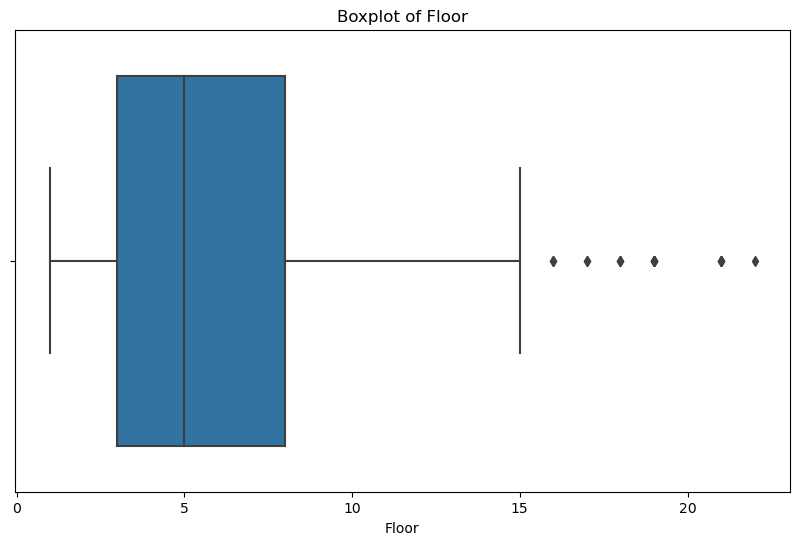

In [22]:
plt.figure(figsize=(10, 6))
sns.boxplot(data['Floor'])
plt.xlabel('Floor')
plt.title('Boxplot of Floor')
plt.show()

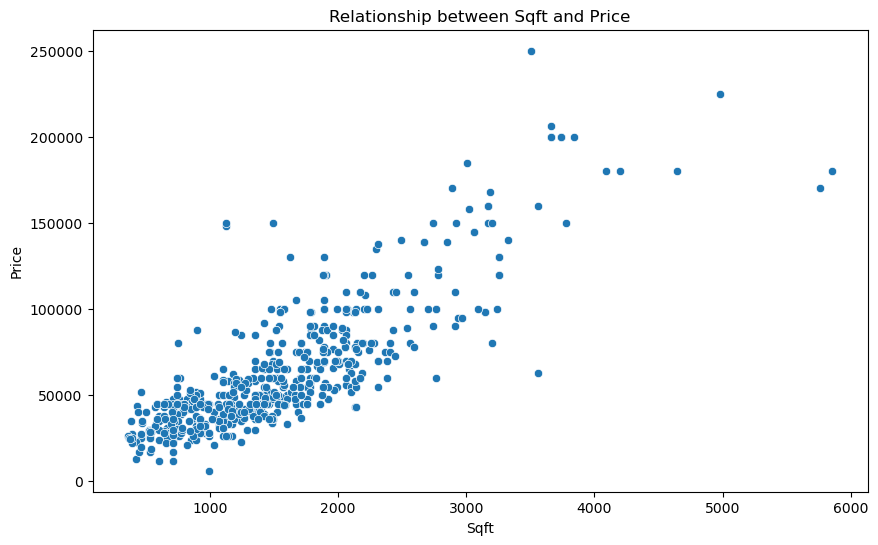

In [23]:
# Visualize the relationship between features and the target variable
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Sqft', y='Price', data=data)
plt.xlabel('Sqft')
plt.ylabel('Price')
plt.title('Relationship between Sqft and Price')
plt.show()



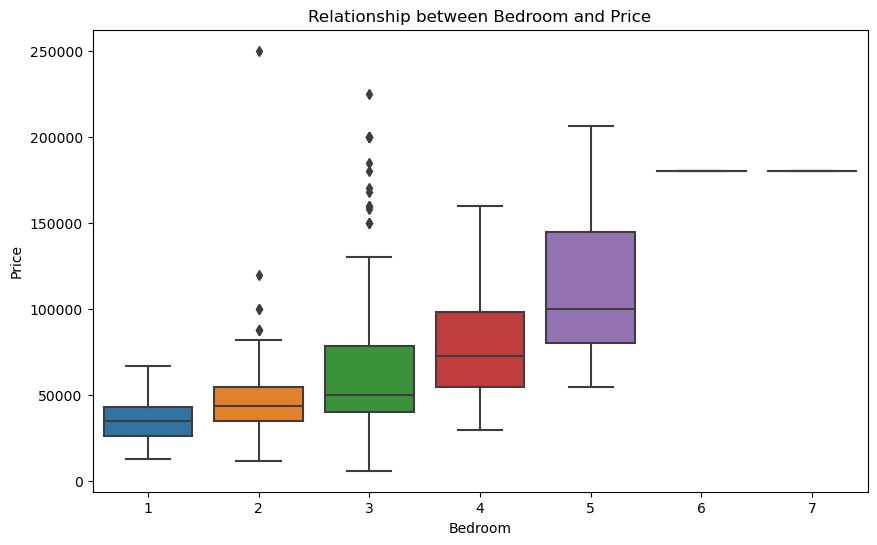

In [24]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Bedroom', y='Price', data=data)
plt.xlabel('Bedroom')
plt.ylabel('Price')
plt.title('Relationship between Bedroom and Price')
plt.show()

In [25]:
# Select relevant features
features = ['Sqft', 'Floor', 'TotalFloor', 'Bedroom', 'Living.Room', 'Bathroom']
target = 'Price'
X = data[features]
y = data[target]

In [26]:
# Perform feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [27]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [28]:
# Create a Linear Regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared Score:", r2)

Mean Squared Error: 401487570.4625884
R-squared Score: 0.7202087278032017


In [29]:
# Compare y_pred with y_test
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(comparison.head())

     Actual     Predicted
632   57777  40792.806314
592   31000  41987.982320
599   60000  76834.191883
291   26000  38178.374196
72    90000  72639.349584
